In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
n_returns=pd.read_csv("ind30_m_vw_rets.csv",header=0,index_col=0,parse_dates=True)
n_returns.index=pd.to_datetime(n_returns.index,format='%Y%m')
n_returns.index=n_returns.index.to_period('M')
n_returns.columns=n_returns.columns.str.strip()
n_returns=n_returns/100

n_firms=pd.read_csv("ind30_m_nfirms.csv",header=0,index_col=0,parse_dates=True)
n_firms.index=pd.to_datetime(n_firms.index,format='%Y%m')
n_firms.index=n_firms.index.to_period('M')
n_firms.columns=n_firms.columns.str.strip()

# n_firms represents firms in that industry during that time

n_size=pd.read_csv("ind30_m_size.csv",header=0,index_col=0,parse_dates=True)
n_size.index=pd.to_datetime(n_size.index,format='%Y%m')
n_size.index=n_size.index.to_period('M')
n_size.columns=n_size.columns.str.strip()

# n_size represents average market capitlization during that time

In [ ]:
n_returns.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,Cnstr,Steel,FabPr,ElcEq,Autos,Carry,Mines,Coal,Oil,Util,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,0.0207,0.0407,0.0543,0.0318,0.1639,0.0102,0.0564,0.0154,-0.0140,0.0704,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,0.0472,0.0217,0.0206,0.0210,0.0423,0.0166,0.0055,0.0085,0.0369,-0.0169,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,-0.0050,0.0015,0.0036,-0.0056,0.0483,0.0273,0.0174,0.0030,-0.0369,0.0204,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,-0.0455,-0.0385,0.0111,-0.0573,-0.0793,-0.0556,-0.0320,0.0223,-0.0104,-0.0263,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,0.0220,0.0386,0.0318,0.0508,-0.0066,0.0787,0.0846,-0.0048,0.0006,0.0371,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [ ]:
n_firms.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,Cnstr,Steel,FabPr,ElcEq,Autos,Carry,Mines,Coal,Oil,Util,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,43,3,16,7,2,8,12,7,17,13,14,45,19,11,39,13,14,8,43,21,5,3,7,6,74,2,33,6,12,4
1926-08,43,3,16,7,2,8,12,7,17,13,14,45,19,11,39,13,14,8,43,21,5,3,7,6,74,2,33,6,12,4
1926-09,43,3,16,7,2,8,12,7,17,13,14,45,19,11,39,13,14,8,42,21,5,3,7,6,74,2,33,6,12,4
1926-10,43,3,16,7,2,8,12,7,17,13,14,45,19,11,39,13,14,8,42,21,5,3,7,6,74,2,33,6,12,4
1926-11,43,3,16,7,2,8,12,7,17,13,14,45,19,11,39,13,14,8,42,21,5,3,7,6,74,2,33,6,12,4


In [ ]:
n_size.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,Cnstr,Steel,FabPr,ElcEq,Autos,Carry,Mines,Coal,Oil,Util,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,35.98,7.12,59.72,26.41,12.02,22.27,18.36,25.52,57.59,6.18,20.05,48.56,27.47,110.78,47.55,41.30,27.74,40.52,92.79,81.22,350.36,13.60,56.70,35.35,66.91,1.19,46.65,10.82,18.83,24.25
1926-08,36.10,6.75,60.47,27.17,13.33,22.13,19.83,25.80,62.13,6.20,20.46,50.39,28.91,114.29,55.11,41.50,29.30,40.83,91.43,86.81,353.27,14.75,57.74,37.86,67.99,0.90,46.57,11.00,18.88,25.51
1926-09,37.00,8.58,64.03,27.30,14.67,21.18,19.29,26.73,65.53,6.71,21.41,51.21,29.34,116.69,57.11,42.17,29.45,41.18,94.86,85.01,360.96,15.05,59.61,36.82,71.02,0.95,46.11,10.94,19.67,27.21
1926-10,37.14,8.92,64.42,28.76,14.42,21.23,19.03,26.87,68.47,6.82,21.10,51.02,29.30,114.93,59.69,43.05,29.46,41.30,90.87,86.41,364.16,15.30,59.52,34.77,70.83,0.88,46.15,10.80,19.36,26.16
1926-11,35.88,8.62,65.08,27.38,15.79,20.14,19.03,26.54,65.06,6.84,20.12,48.90,29.60,108.33,54.81,40.44,28.51,41.90,89.87,83.92,363.74,14.89,58.74,32.80,68.75,0.74,45.03,10.33,18.35,23.94


In [ ]:
n_market_cap=n_firms*n_size
n_market_cap.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,Cnstr,Steel,FabPr,ElcEq,Autos,Carry,Mines,Coal,Oil,Util,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,1547.14,21.36,955.52,184.87,24.04,178.16,220.32,178.64,979.03,80.34,280.70,2185.20,521.93,1218.58,1854.45,536.90,388.36,324.16,3989.97,1705.62,1751.80,40.80,396.90,212.10,4951.34,2.38,1539.45,64.92,225.96,97.00
1926-08,1552.30,20.25,967.52,190.19,26.66,177.04,237.96,180.60,1056.21,80.60,286.44,2267.55,549.29,1257.19,2149.29,539.50,410.20,326.64,3931.49,1823.01,1766.35,44.25,404.18,227.16,5031.26,1.80,1536.81,66.00,226.56,102.04
1926-09,1591.00,25.74,1024.48,191.10,29.34,169.44,231.48,187.11,1114.01,87.23,299.74,2304.45,557.46,1283.59,2227.29,548.21,412.30,329.44,3984.12,1785.21,1804.80,45.15,417.27,220.92,5255.48,1.90,1521.63,65.64,236.04,108.84
1926-10,1597.02,26.76,1030.72,201.32,28.84,169.84,228.36,188.09,1163.99,88.66,295.40,2295.90,556.70,1264.23,2327.91,559.65,412.44,330.40,3816.54,1814.61,1820.80,45.90,416.64,208.62,5241.42,1.76,1522.95,64.80,232.32,104.64
1926-11,1542.84,25.86,1041.28,191.66,31.58,161.12,228.36,185.78,1106.02,88.92,281.68,2200.50,562.40,1191.63,2137.59,525.72,399.14,335.20,3774.54,1762.32,1818.70,44.67,411.18,196.80,5087.50,1.48,1485.99,61.98,220.20,95.76


In [ ]:
total_m_cap=n_market_cap.sum(axis='columns') #total market capitalization
n_cap_weights=n_market_cap.divide(total_m_cap,axis='rows')
total_market_return = (n_cap_weights*n_returns).sum(axis="columns")
total_market_return


1926-07    0.031375
1926-08    0.028957
1926-09    0.005566
1926-10   -0.028504
1926-11    0.028039
             ...   
2018-08    0.036951
2018-09    0.002108
2018-10   -0.074292
2018-11    0.019003
2018-12   -0.092911
Freq: M, Length: 1110, dtype: float64

#CONSIDERING DATA 2000 onwards

In [ ]:
risky_r=n_returns['2000':][['Steel','Fin','Beer']]

In [ ]:
risky_r.head()

,Steel,Fin,Beer
2000-01,-0.0277,-0.0442,-0.0228
2000-02,0.0684,-0.0849,-0.1164
2000-03,0.0349,0.1669,0.0013
2000-04,-0.0084,-0.0425,0.0368
2000-05,-0.0492,0.0506,0.1187


In [ ]:
safe_r=pd.DataFrame().reindex_like(risky_r)

In [ ]:
safe_r[:]=0.03/12 #monthly returns mota moti 0.03/12 assumed hai

In [ ]:
risky_r

,Steel,Fin,Beer
2000-01,-0.0277,-0.0442,-0.0228
2000-02,0.0684,-0.0849,-0.1164
2000-03,0.0349,0.1669,0.0013
2000-04,-0.0084,-0.0425,0.0368
2000-05,-0.0492,0.0506,0.1187
...,...,...,...
2018-08,-0.0323,0.0245,-0.0186
2018-09,-0.0067,-0.0193,0.0019
2018-10,-0.1161,-0.0545,-0.0157
2018-11,-0.0300,0.0289,0.0579


In [ ]:
#1. Cushion - (Asset value - Floor value)
#2. Compute an Allocation to safe and risky assets -> using m
#3. Recompute the asset value based on returns

In [ ]:
dates=risky_r.index
n_steps=len(dates)

m=3
account_history=pd.DataFrame().reindex_like(risky_r)
cushion_history=pd.DataFrame().reindex_like(risky_r)
risky_w_history=pd.DataFrame().reindex_like(risky_r)
floor_history=pd.DataFrame().reindex_like(risky_r)



#CPPI IMPLEMENTATION WITH DRAWDOWN CONSTRAINED FLOOR

In [ ]:
temp=0

start=1000

account_value=1000
drawdown_limit=0.25 # 25% bc
for step in range(n_steps):

  if temp==0:
    floor_value=start*(1-drawdown_limit)
    max_till_then=start
    temp=1

  else:
    max_till_then=np.maximum(max_till_then,account_value)
    floor_value=max_till_then*(1-drawdown_limit)
    
  cushion = (account_value-floor_value)/account_value
  risky_w = m*cushion

  risky_w = np.minimum(risky_w,1)
  risky_w=np.maximum(risky_w,0)

  # this ensures risky_w to be in betwwen 0 and 1

  safe_w = 1-risky_w

  risky_allocation=account_value*risky_w
  safe_allocation=account_value*safe_w

  ##updation of account value

  account_value = (risky_allocation*(1+risky_r.iloc[step]))+(safe_allocation*(1+safe_r.iloc[step]))

  # saving the values so I can look at history and plot it

  cushion_history.iloc[step]=cushion
  risky_w_history.iloc[step]=risky_w
  account_history.iloc[step]=account_value
  floor_history.iloc[step]=floor_value

  # all the operations will be performed simultaneously on all columns

In [ ]:
account_history.head() # at the end of that month

,Steel,Fin,Beer
2000-01,979.850000,967.475000,983.525000
2000-02,1027.740970,912.871742,902.685445
2000-03,1055.284428,995.482265,904.392491
2000-04,1049.295689,964.830865,922.540460
2000-05,1011.929128,998.243036,984.994415


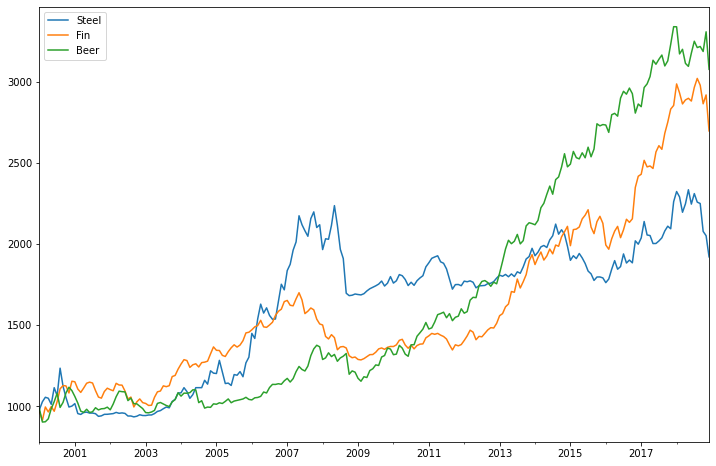

In [ ]:
account_history.plot(figsize=(12,8))

In [ ]:
cushion_history.head() # at the beginnig of the month

,Steel,Fin,Beer
2000-01,0.250000,0.250000,0.250000
2000-02,0.234577,0.224786,0.237437
2000-03,0.250000,0.178417,0.169146
2000-04,0.250000,0.246596,0.170714
2000-05,0.245719,0.222662,0.187028


In [ ]:
risky_w_history.head() # for that month

,Steel,Fin,Beer
2000-01,0.750000,0.750000,0.750000
2000-02,0.703730,0.674359,0.712310
2000-03,0.750000,0.535251,0.507437
2000-04,0.750000,0.739789,0.512142
2000-05,0.737158,0.667985,0.561083


In [ ]:
floor_history.head()

,Steel,Fin,Beer
2000-01,750.000000,750.0,750.0
2000-02,750.000000,750.0,750.0
2000-03,770.805727,750.0,750.0
2000-04,791.463321,750.0,750.0
2000-05,791.463321,750.0,750.0


#PORTFOLIO WITHOUT CPPI STRATEGY

[]

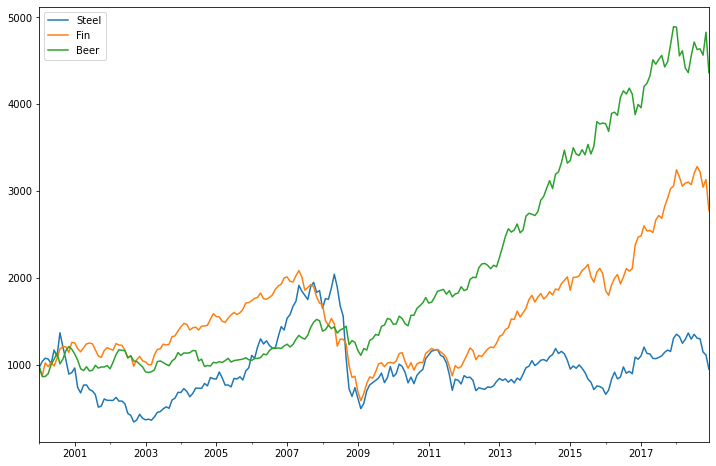

In [ ]:
risky_wealth = start*(1+risky_r).cumprod()

risky_wealth.plot(figsize=(12,8))
plt.plot()

#PORTFOLIO WITH CPPI STRATEGY

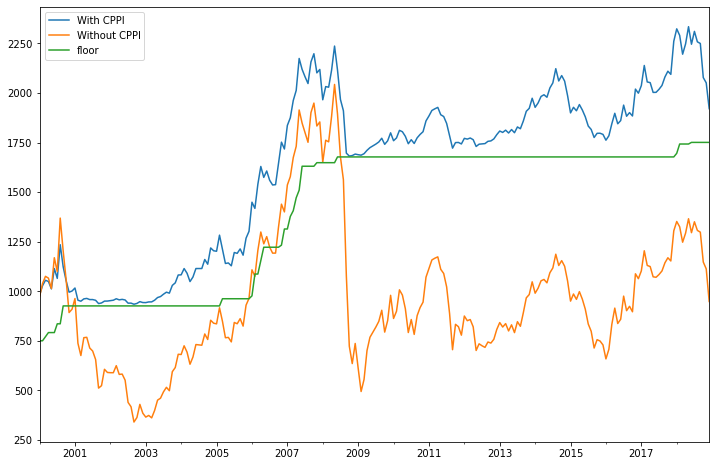

In [ ]:
account_history['Steel'].plot(figsize=(12,8),label='With CPPI',legend=True)
risky_wealth['Steel'].plot(figsize=(12,8),label='Without CPPI',legend=True)
floor_history['Steel'].plot(figsize=(12,8),label='floor',legend=True)

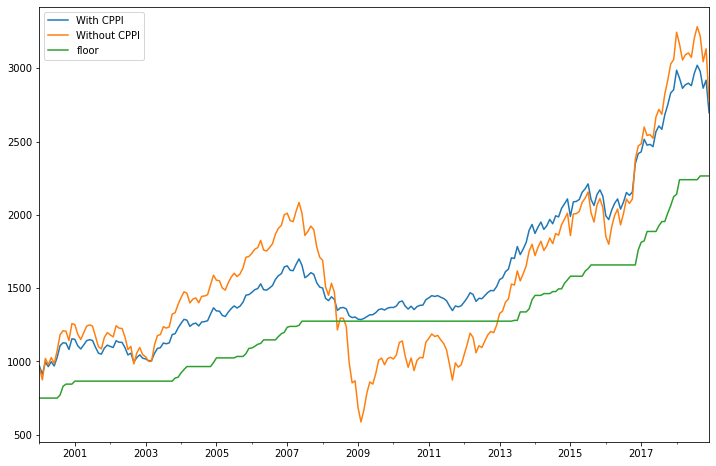

In [ ]:
account_history['Fin'].plot(figsize=(12,8),label='With CPPI',legend=True)
risky_wealth['Fin'].plot(figsize=(12,8),label='Without CPPI',legend=True)
floor_history['Fin'].plot(figsize=(12,8),label='floor',legend=True)

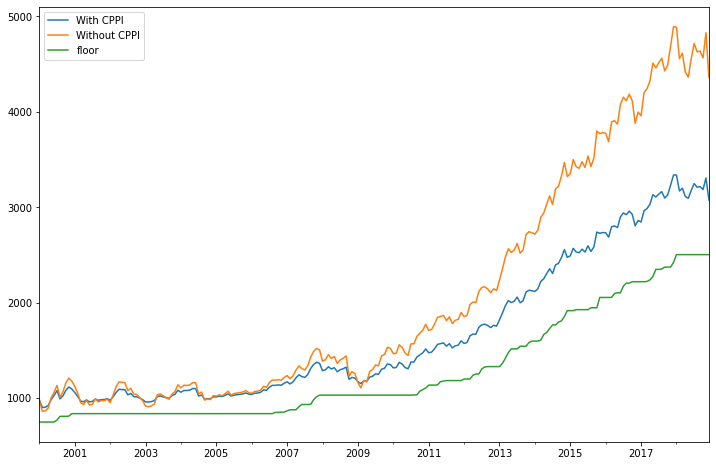

In [ ]:
account_history['Beer'].plot(figsize=(12,8),label='With CPPI',legend=True)
risky_wealth['Beer'].plot(figsize=(12,8),label='Without CPPI',legend=True)
floor_history['Beer'].plot(figsize=(12,8),label='floor',legend=True)